In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("/Users/luolan/Desktop/Function Analysis.csv")

# Clean and preprocess the data
data['Price (USD)'] = data['Price (USD)'].replace('[\$,]', '', regex=True).astype(float)  # Convert price to float

# Drop rows where any of these important columns are NaN
data.dropna(subset=['Brand', 'Price (USD)', 'GPS', 'Heart Rate Monitor'], inplace=True)


In [2]:
# Filter data for Garmin and competitors
garmin_data = data[data['Brand'].str.contains('Garmin', case=False)]
competitors_data = data[~data['Brand'].str.contains('Garmin', case=False)]

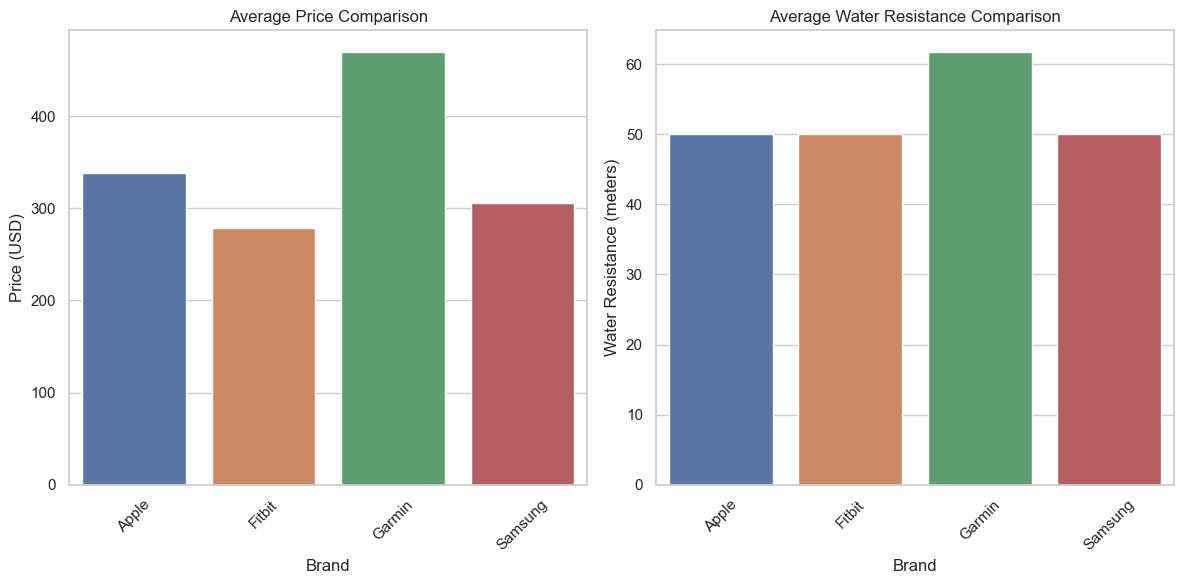

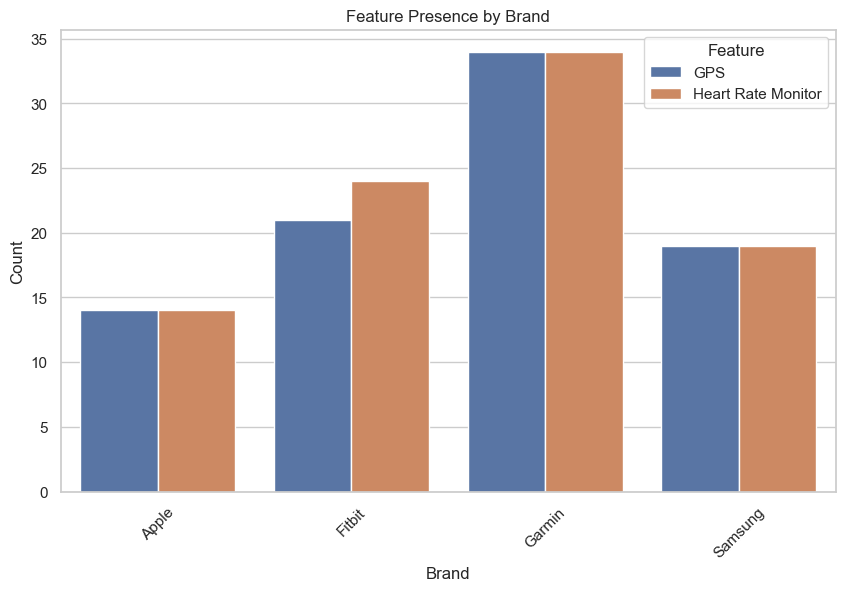

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean and preprocess the data
data['Price (USD)'] = data['Price (USD)'].replace('[\$,]', '', regex=True).astype(float)  # Convert price to float
data['Water Resistance (meters)'] = pd.to_numeric(data['Water Resistance (meters)'], errors='coerce')  # Convert water resistance to numeric

# Drop rows where any of these important columns are NaN
data.dropna(subset=['Brand', 'Price (USD)', 'GPS', 'Heart Rate Monitor', 'Water Resistance (meters)'], inplace=True)

# Define main competitors
main_competitors = ['Garmin', 'Apple', 'Samsung', 'Fitbit']

# Filter data for Garmin and main competitors
filtered_data = data[data['Brand'].isin(main_competitors)]

# Average price and water resistance for filtered data
average_metrics = filtered_data.groupby('Brand').agg({
    'Price (USD)': 'mean',
    'Water Resistance (meters)': 'mean'
}).reset_index()

# Feature presence count for filtered data using a list
feature_presence = filtered_data.groupby('Brand')[['GPS', 'Heart Rate Monitor']].agg(lambda x: (x == 'Yes').sum()).reset_index()

# Set up the plotting
sns.set(style="whitegrid")

# Plot for average price and water resistance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Brand', y='Price (USD)', data=average_metrics, ax=ax[0])
ax[0].set_title('Average Price Comparison')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Brand', y='Water Resistance (meters)', data=average_metrics, ax=ax[1])
ax[1].set_title('Average Water Resistance Comparison')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Plot for feature presence
fig, ax = plt.subplots(figsize=(10, 6))
melted_features = feature_presence.melt(id_vars="Brand", var_name="Feature", value_name="Count")
sns.barplot(x='Brand', y='Count', hue='Feature', data=melted_features, ax=ax)
ax.set_title('Feature Presence by Brand')
ax.tick_params(axis='x', rotation=45)
plt.show()


In [4]:
# Load the dataset to examine its structure
file_path = '/Users/luolan/Desktop/Market Analysis.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and column names to understand its structure
data.head(), data.columns

(  Brand Name  Device Type    Model Name  Color Selling Price Original Price  \
 0     Xiaomi  FitnessBand  Smart Band 5  Black         2,499          2,999   
 1     Xiaomi  FitnessBand  Smart Band 4  Black         2,099          2,499   
 2     Xiaomi  FitnessBand      HMSH01GE  Black         1,722          2,099   
 3     Xiaomi  FitnessBand  Smart Band 5  Black         2,469          2,999   
 4     Xiaomi  FitnessBand        Band 3  Black         1,799          2,199   
 
           Display  Rating (Out of 5)              Strap Material  \
 0  AMOLED Display                4.1  Thermoplastic polyurethane   
 1  AMOLED Display                4.2  Thermoplastic polyurethane   
 2     LCD Display                3.5                     Leather   
 3  AMOLED Display                4.1  Thermoplastic polyurethane   
 4    OLED Display                4.3                     Plastic   
 
    Average Battery Life (in days) Reviews  
 0                              14     NaN  
 1          

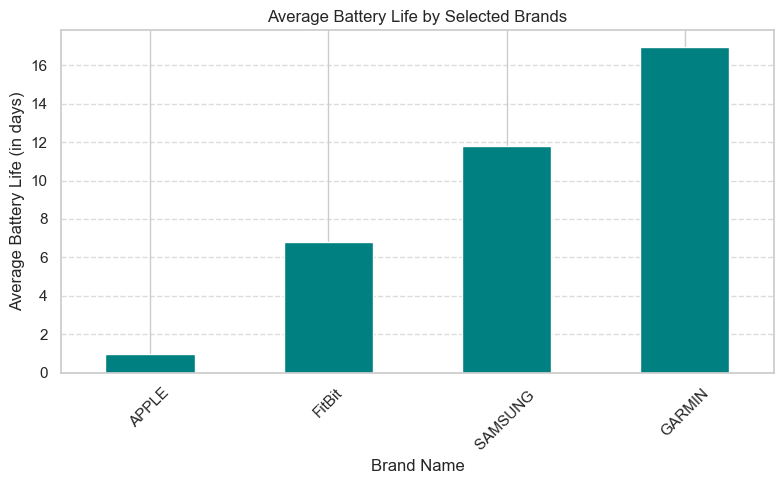

In [5]:
# Correct the selected brand names based on the actual names in the dataset
corrected_brands = ['APPLE', 'FitBit', 'GARMIN', 'SAMSUNG ']

# Filter the data for the corrected brand names
corrected_filtered_data = data[data['Brand Name'].isin(corrected_brands)]

# Group the corrected filtered data by Brand and calculate the mean battery life
corrected_selected_brand_battery_life = corrected_filtered_data.groupby('Brand Name')['Average Battery Life (in days)'].mean().sort_values()

# Generate a bar chart for the corrected selected brands
plt.figure(figsize=(8, 5))
corrected_selected_brand_battery_life.plot(kind='bar', color='teal')
plt.title('Average Battery Life by Selected Brands')
plt.xlabel('Brand Name')
plt.ylabel('Average Battery Life (in days)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()